Song, Shim, Rosenberg (2022) Large-scale neural dynamics in a shared low-dimensional state space reflect cognitive and attentional dynamics<br>
code created by: Hayoung Song (hyssong@uchicago.edu), March 27, 2022

The code generates **Figure 5** of the paper

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd
from statsmodels.stats.multitest import fdrcorrection
random.seed(1234)

In [2]:
nstate  = 4
nsubj   = 27
loaddir ='../'
niter   = 1000
cmap = np.array([[219 / 255, 68 / 255, 55 / 255],
    [57 / 255, 0 / 255, 216 / 255],
    [15 / 255, 157 / 255, 88 / 255],
    [255 / 255, 215 / 255, 0 / 255]])
statename = ['DMN','DAN','SM','base']

## GradCPT: Latent state dynamics & Inverted RT variability (Figure 5c)

/var/folders/qv/ycsblvjs0bnd5ssgv07h6s6m0000gn/T/ipykernel_5124/802030833.py:12: RuntimeWarning: Mean of empty slice
  stateocc[subj,stt-1]=np.nanmean(beh[subj,np.where(seq[subj,:]==stt)[0]])
/var/folders/qv/ycsblvjs0bnd5ssgv07h6s6m0000gn/T/ipykernel_5124/802030833.py:29: RuntimeWarning: Mean of empty slice
  stateocc_niter[subj,stt-1]=np.nanmean(beh_null[np.where(seq[subj,:]==stt)[0]])
/var/folders/qv/ycsblvjs0bnd5ssgv07h6s6m0000gn/T/ipykernel_5124/802030833.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['DMN','DAN','SM','base'])


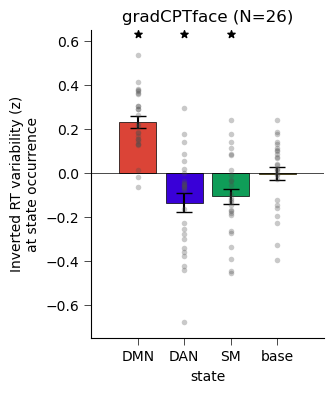

/var/folders/qv/ycsblvjs0bnd5ssgv07h6s6m0000gn/T/ipykernel_5124/802030833.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['DMN','DAN','SM','base'])


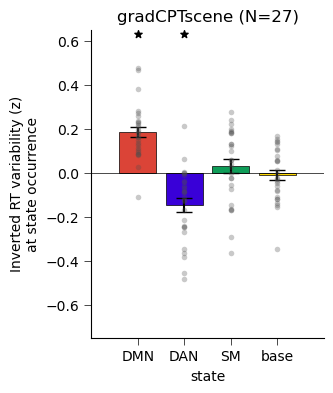

In [3]:
condition=['gradCPTface','gradCPTscene']
for i, cdt in enumerate(condition):
    # Load HMM-derived latent state sequence
    seq = scipy.io.loadmat(loaddir+'fmri/hmmoutput.mat')[cdt]
    # Load time-resolved attention measures: Inverse of RT variability time course  (z-normalized)
    beh = scipy.io.loadmat(loaddir+'behavior/'+cdt+'_beh.mat')['rtvariability_conv'].T*(-1)
    
    # Categorize attention measure of each TR to latent state identification
    stateocc = np.zeros((nsubj,nstate))
    for subj in range(nsubj):
        for stt in range(1,nstate+1):
            stateocc[subj,stt-1]=np.nanmean(beh[subj,np.where(seq[subj,:]==stt)[0]])
    stateocc_real=np.nanmean(stateocc,0)
    
    # to visualize data points
    valus = np.concatenate((stateocc[:,0], stateocc[:,1], stateocc[:,2],stateocc[:,3]),0)
    categ = np.concatenate((np.repeat('state1',nsubj), np.repeat('state2',nsubj), np.repeat('state3',nsubj), np.repeat('state4',nsubj)),0)
    categ = np.delete(categ,np.where(np.isnan(valus))[0])
    valus = np.delete(valus,np.where(np.isnan(valus))[0])
    df = pd.DataFrame(data={'state':categ,'values':valus})
    
    # Chance distribution: circular-shift attention time course 1,000 times and relate them with the latent state sequence
    stateocc_null = []
    for null in range(niter):
        stateocc_niter = np.zeros((nsubj,nstate))
        for subj in range(nsubj):
            beh_null = np.roll(beh[subj,:],np.random.randint(beh[subj,:].shape[0]-20)+10)
            for stt in range(1,nstate+1):
                stateocc_niter[subj,stt-1]=np.nanmean(beh_null[np.where(seq[subj,:]==stt)[0]])
        stateocc_null.append(np.nanmean(stateocc_niter,0))
    stateocc_null=np.array(stateocc_null)
    
    # two-tailed test
    pvals = []
    for stt in range(nstate):
        rl = stateocc_real[stt] - np.mean(stateocc_null[:,stt])
        nl = stateocc_null[:,stt] - np.mean(stateocc_null[:,stt])
        pvals.append((1+np.where(np.abs(rl)<=np.abs(nl))[0].shape[0])/(1+niter))
    qvals=fdrcorrection(np.array(pvals))[1]
    
    # Bar plot
    fig, ax = plt.subplots(1,1, figsize=(3,4))
    ax.bar(np.arange(nstate),np.nanmean(stateocc,0), color=cmap, edgecolor='black',linewidth=0.5)
    ax.errorbar(np.arange(nstate),np.nanmean(stateocc,0),
                 np.nanstd(stateocc,0)/np.sqrt(stateocc.shape[0]-np.sum(np.isnan(stateocc[:,0]))),
                 capsize=6,ecolor='black',ls='none')
    sns.stripplot(x="state", y="values", data=df, color=[0.3,0.3,0.3],jitter=False,alpha=0.3, size=4)
    plt.hlines(0, -1, 4, colors='black', linewidth=0.5)
    ax.set_ylim([-0.75, 0.65])
    ax.set_xlim([-1,4])
    ax.tick_params(direction='out', length=6, width=0.6)
    ax.set_ylabel('Inverted RT variability (z)\nat state occurrence')
    ax.set_xticklabels(['DMN','DAN','SM','base'])
    ax.tick_params(length=5, width=0.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(cdt+' (N='+str(stateocc.shape[0]-np.sum(np.isnan(stateocc[:,0])))+')')
    for stt in range(nstate):
        if qvals[stt]<0.01:
            plt.scatter(stt,0.63,30,'k','*')
    plt.show()

## Movie watching: Latent state dynamics & Self-reported narrative engagement (Figure 5e, 5g)

/var/folders/qv/ycsblvjs0bnd5ssgv07h6s6m0000gn/T/ipykernel_5124/459608050.py:12: RuntimeWarning: Mean of empty slice
  stateocc[subj,stt-1]=np.nanmean(beh[subj,np.where(seq[subj,:]==stt)[0]])
/var/folders/qv/ycsblvjs0bnd5ssgv07h6s6m0000gn/T/ipykernel_5124/459608050.py:29: RuntimeWarning: Mean of empty slice
  stateocc_niter[subj,stt-1]=np.nanmean(beh_null[np.where(seq[subj,:]==stt)[0]])
/var/folders/qv/ycsblvjs0bnd5ssgv07h6s6m0000gn/T/ipykernel_5124/459608050.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['DMN','DAN','SM','base'])


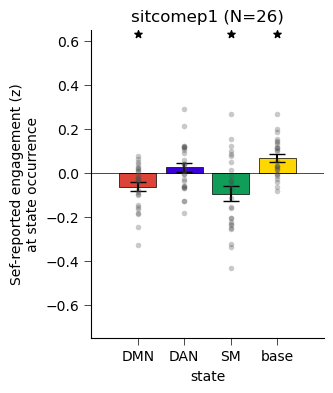

/var/folders/qv/ycsblvjs0bnd5ssgv07h6s6m0000gn/T/ipykernel_5124/459608050.py:12: RuntimeWarning: Mean of empty slice
  stateocc[subj,stt-1]=np.nanmean(beh[subj,np.where(seq[subj,:]==stt)[0]])
/var/folders/qv/ycsblvjs0bnd5ssgv07h6s6m0000gn/T/ipykernel_5124/459608050.py:29: RuntimeWarning: Mean of empty slice
  stateocc_niter[subj,stt-1]=np.nanmean(beh_null[np.where(seq[subj,:]==stt)[0]])
/var/folders/qv/ycsblvjs0bnd5ssgv07h6s6m0000gn/T/ipykernel_5124/459608050.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['DMN','DAN','SM','base'])


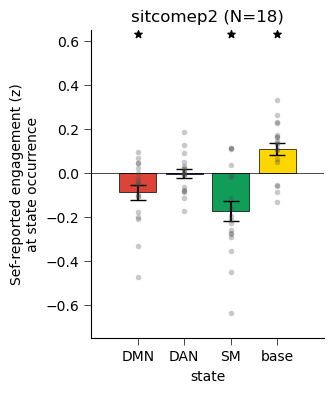

/var/folders/qv/ycsblvjs0bnd5ssgv07h6s6m0000gn/T/ipykernel_5124/459608050.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['DMN','DAN','SM','base'])


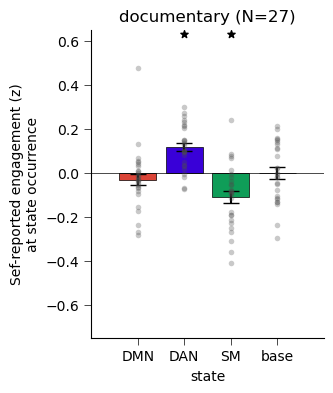

In [4]:
condition=['sitcomep1','sitcomep2','documentary']
for i, cdt in enumerate(condition):
    # Load HMM-derived latent state sequence
    seq = scipy.io.loadmat(loaddir+'fmri/hmmoutput.mat')[cdt]
    # Load time-resolved attention measures: Self-reported narrative engagement (z-normalized)
    beh = scipy.io.loadmat(loaddir+'behavior/'+cdt+'_beh.mat')['engagement_conv'].T
    
    # Categorize attention measure of each TR to latent state identification
    stateocc = np.zeros((nsubj,nstate))
    for subj in range(nsubj):
        for stt in range(1,nstate+1):
            stateocc[subj,stt-1]=np.nanmean(beh[subj,np.where(seq[subj,:]==stt)[0]])
    stateocc_real=np.nanmean(stateocc,0)
    
    # to visualize data points
    valus = np.concatenate((stateocc[:,0], stateocc[:,1], stateocc[:,2],stateocc[:,3]),0)
    categ = np.concatenate((np.repeat('state1',nsubj), np.repeat('state2',nsubj), np.repeat('state3',nsubj), np.repeat('state4',nsubj)),0)
    categ = np.delete(categ,np.where(np.isnan(valus))[0])
    valus = np.delete(valus,np.where(np.isnan(valus))[0])
    df = pd.DataFrame(data={'state':categ,'values':valus})
    
    # Chance distribution: circular-shift attention time course 1,000 times and relate them with the latent state sequence
    stateocc_null = []
    for null in range(niter):
        stateocc_niter = np.zeros((nsubj,nstate))
        for subj in range(nsubj):
            beh_null = np.roll(beh[subj,:],np.random.randint(beh[subj,:].shape[0]-20)+10)
            for stt in range(1,nstate+1):
                stateocc_niter[subj,stt-1]=np.nanmean(beh_null[np.where(seq[subj,:]==stt)[0]])
        stateocc_null.append(np.nanmean(stateocc_niter,0))
    stateocc_null=np.array(stateocc_null)
    
    # two-tailed test
    pvals = []
    for stt in range(nstate):
        rl = stateocc_real[stt] - np.mean(stateocc_null[:,stt])
        nl = stateocc_null[:,stt] - np.mean(stateocc_null[:,stt])
        pvals.append((1+np.where(np.abs(rl)<=np.abs(nl))[0].shape[0])/(1+niter))
    qvals=fdrcorrection(np.array(pvals))[1]

    # Bar plot
    fig, ax = plt.subplots(1,1, figsize=(3,4))
    ax.bar(np.arange(nstate),np.nanmean(stateocc,0), color=cmap, edgecolor='black',linewidth=0.5)
    ax.errorbar(np.arange(nstate),np.nanmean(stateocc,0),
                 np.nanstd(stateocc,0)/np.sqrt(stateocc.shape[0]-np.sum(np.isnan(stateocc[:,0]))),
                 capsize=6,ecolor='black',ls='none')
    sns.stripplot(x="state", y="values", data=df, color=[0.3,0.3,0.3],jitter=False,alpha=0.3, size=4)
    plt.hlines(0, -1, 4, colors='black', linewidth=0.5)
    ax.set_ylim([-0.75, 0.65])
    ax.set_xlim([-1,4])
    ax.tick_params(direction='out', length=6, width=0.6)
    ax.set_ylabel('Sef-reported engagement (z)\nat state occurrence')
    ax.set_xticklabels(['DMN','DAN','SM','base'])
    ax.tick_params(length=5, width=0.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(cdt+' (N='+str(stateocc.shape[0]-np.sum(np.isnan(stateocc[:,0])))+')')
    for stt in range(nstate):
        if qvals[stt]<0.01:
            plt.scatter(stt,0.63,30,'k','*')
    plt.show()